In [ ]:
using Pkg
Pkg.activate(".")
include("./modules/IVTthermo.jl")

In [8]:
#Importing our experimental data
IVTsol = Matrix(CSV.read("data/binarycrystal.csv",DataFrame))
cystalIVTATP4 = IVTsol[IVTsol[:,3].==4.0,:]
cystalIVTATP20 = IVTsol[IVTsol[:,3].==20.0,:]

solubility0mMATP37 = getdatamatrix("data/solubility37.csv")
solubility0mMATP25 = getdatamatrix("data/solubility25.csv")
solubility4mMATP37 = getdatamatrix("data/solubility37C_4mMATP_ATPsubtract.csv",minMg = 1, minPPi = 1)
solubility4mMATP25 = getdatamatrix("data/solubility25C_4mMATP_ATPsubtract.csv",minMg = 1, minPPi = 1)
solubility20mMATP25 = getdatamatrix("data/solubility25C_20mMATP_ATPsubtract.csv",minMg = 1, minPPi = 1)
ATP4mMbool = getdatamatrix("data/crystal_bool_4mM.csv")
ATP20mMbool = getdatamatrix("data/crystal_bool_20mM.csv");

#Importing our thermodynamic model parameters
(Ksmodel, ΔHsmodel) = setupmodel_thermo();
Ks = fullparameterset(Ksmodel,[])
ΔHs = fullparameterset(ΔHsmodel,[])

#We fit these two parameters based on solubility measurements of Mg2PPi*3.5H20 taken at 25 and 37C
ΔHs.Ksp_Mg2PPi = 58
Ks.Ksp_Mg2PPi = 1.63e-13
Ks37 =  newtempKs(Ks,ΔHs,37)

#This represents putting Mg2PPi*3.5H20 in 40 mM Tris pH 8.0 @ 37C and measuring eq. Mg concentration in solution
#Experimentally we got 780 +- 70 uM Mg
(Mg, PPi, res) = getsolubilityRO(Ks37,1e-9,1e-9,0; tol = 1e-8)
println("Experimental Value: 780 +- 70 uM Mg. Model: "*string(round(1e6*Mg,digits = 1))*" uM Mg.")

#This represents putting Mg2PPi*3.5H20 in 40 mM Tris pH 8.0 @ 25C and measuring eq. Mg concentration in solution
#Experimentally we got 440 +- 70 uM Mg
(Mg, PPi, res) = getsolubilityRO(Ks,1e-9,1e-9,0; tol = 1e-8)
println("Experimental Value: 440 +- 70 uM Mg. Model: "*string(round(1e6*Mg,digits = 1))*" uM Mg.")

Experimental Value: 780 +- 70 uM Mg. Model: 783.0 uM Mg.
Experimental Value: 440 +- 70 uM Mg. Model: 441.1 uM Mg.


┌ Warning: scale log is unsupported with Plots.GRBackend().
│ Choose from: [:identity, :ln, :log10, :log2]
└ @ Plots C:\Users\ChemeGrad2021\.julia\packages\Plots\Ec1L1\src\args.jl:1584
┌ Warning: scale log is unsupported with Plots.GRBackend().
│ Choose from: [:identity, :ln, :log10, :log2]
└ @ Plots C:\Users\ChemeGrad2021\.julia\packages\Plots\Ec1L1\src\args.jl:1584
┌ Warning: scale log is unsupported with Plots.GRBackend().
│ Choose from: [:identity, :ln, :log10, :log2]
└ @ Plots C:\Users\ChemeGrad2021\.julia\packages\Plots\Ec1L1\src\args.jl:1584
┌ Warning: scale log is unsupported with Plots.GRBackend().
│ Choose from: [:identity, :ln, :log10, :log2]
└ @ Plots C:\Users\ChemeGrad2021\.julia\packages\Plots\Ec1L1\src\args.jl:1584
┌ Warning: scale log is unsupported with Plots.GRBackend().
│ Choose from: [:identity, :ln, :log10, :log2]
└ @ Plots C:\Users\ChemeGrad2021\.julia\packages\Plots\Ec1L1\src\args.jl:1584
┌ Warning: scale log is unsupported with Plots.GRBackend().
│ Choose from: 

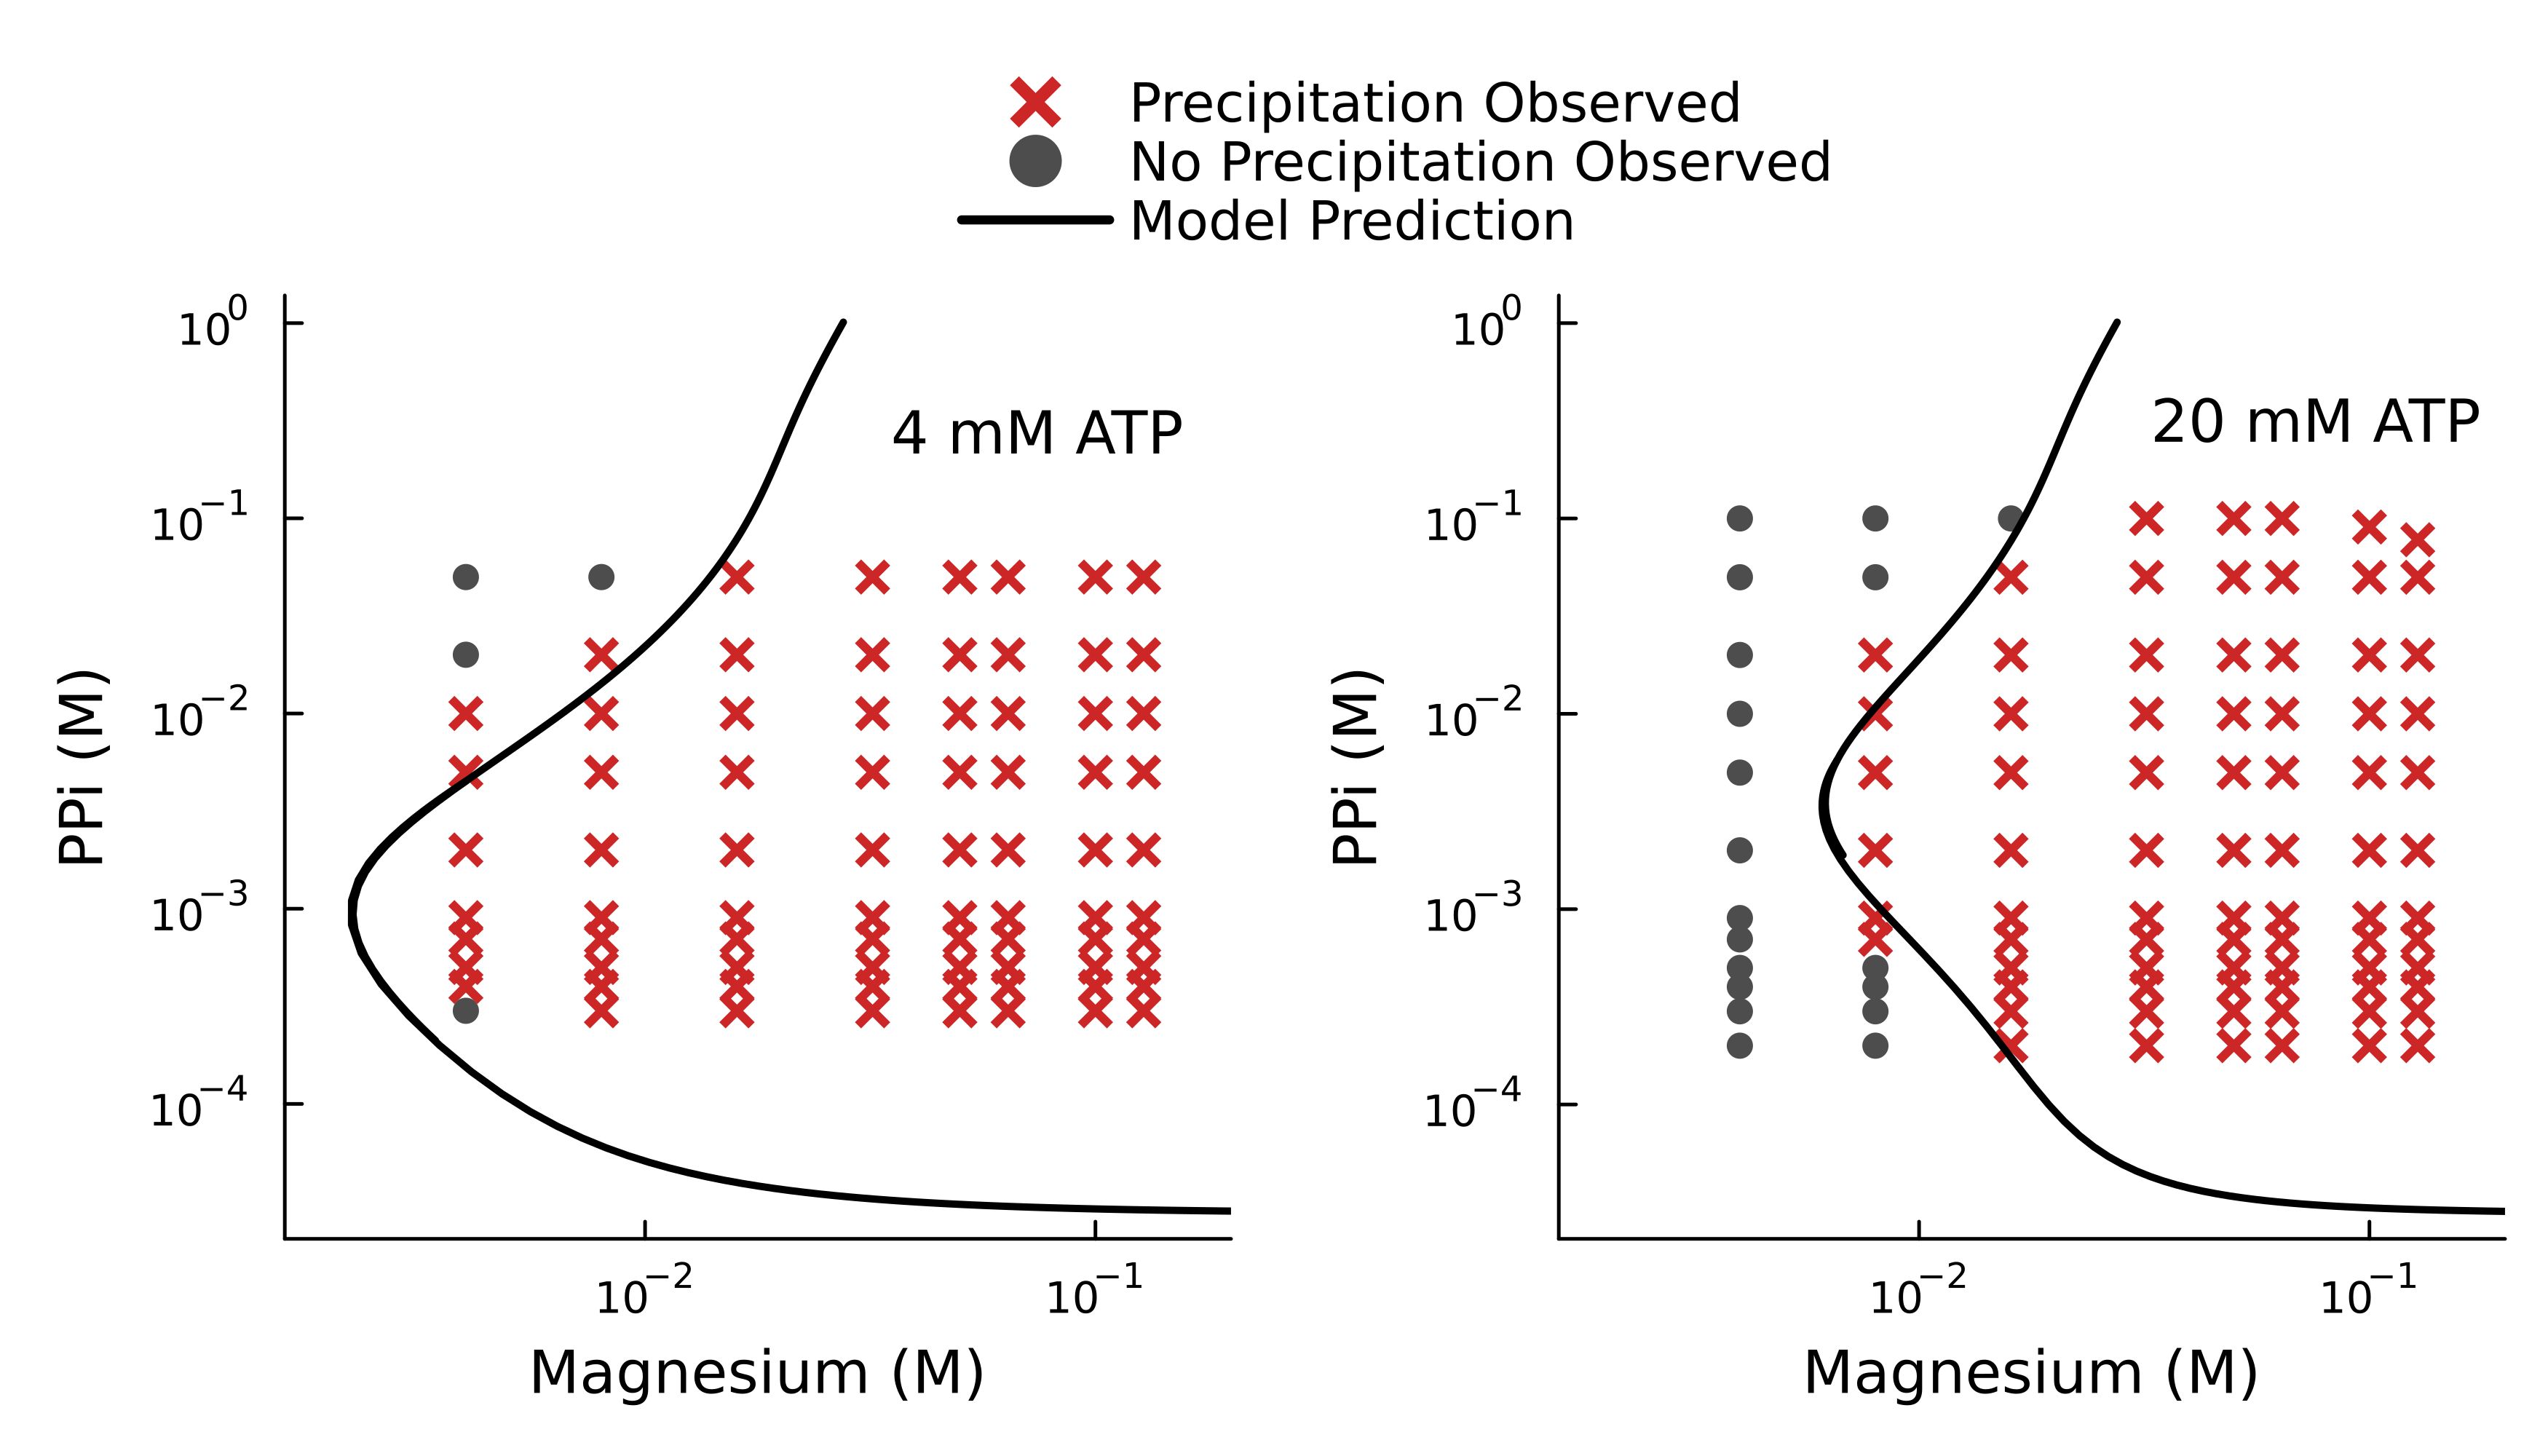

GKS: Rectangle definition is invalid in routine SET_VIEWPORT
GKS: Rectangle definition is invalid in routine SET_VIEWPORT
GKS: Rectangle definition is invalid in routine SET_VIEWPORT
GKS: Rectangle definition is invalid in routine SET_VIEWPORT
GKS: Rectangle definition is invalid in routine SET_VIEWPORT
GKS: Rectangle definition is invalid in routine SET_VIEWPORT


In [28]:
#Using these parameters, we 
color1 = :firebrick3
color2 = :grey30
ATP4plt = plotCryscatter(cystalIVTATP4,color1=color1,color2=color2)
legendplot = plotCryscatter(cystalIVTATP4,color1=color1,color2=color2)
ATP20plt = plotCryscatter(cystalIVTATP20,color1=color1,color2=color2)

solubilitycurve!(ATP4plt, Ks37, ATP = 4e-3, spermadine = 2e-3, color = :black, label = "Model Prediction")   
solubilitycurve!(legendplot, Ks37, ATP = 4e-3, spermadine = 2e-3, color = :black, label = "Model Prediction",legend = :outertop)   
plot!(legendplot, frame=:none, fg_color_legend = nothing,legendfontsize=10,lims=(1e-11,1e-10), size = (800,50))
solubilitycurve!(ATP20plt, Ks37, ATP = 20e-3, spermadine = 2e-3, color = :black, label = "Model Prediction")   

fontsize = 11
dataplot = plot(ATP4plt,ATP20plt,size = (700,400), leftmargin = 5mm,bottommargin = 5mm,grid = false)
#annotate!(sp=1,[(relativex(0.003; sp=1), relativey(0.27; sp=1), text("A",25))],z_order = :front)
#annotate!(sp=2,[(relativex(0.009; sp=2), relativey(0.3; sp=2), text("B",25))],z_order = :front)
annotate!(sp=1,[(relativex(0.15; sp=1), relativey(0.2; sp=1), text("4 mM ATP",fontsize))],z_order = :front)
annotate!(sp=2,[(relativex(0.23; sp=2), relativey(0.23; sp=2), text("20 mM ATP",fontsize))],z_order = :front)
l = @layout  [a{0.05h}; b]
masterplot = plot(legendplot, dataplot,layout = l, dpi = 500, xlims = (10^(-2.8),0.2))
savefig(masterplot,"figures/IVTsolubilitymodel.png")
savefig(masterplot,"figures/IVTsolubilitymodel.pdf")
masterplot